In [111]:
#데이터 구성 패키지
import pandas as pd

#행렬 연산 패키지
import numpy as np

#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

#통계 분석 패키지
from scipy import stats
import scipy.stats

import seaborn as sns

# 실습 1

In [112]:
df = pd.read_csv("../data/titanic.csv", encoding='utf-8')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [113]:
#1. 데이터 속성 및 기술통계량 확인(1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [114]:
#1. 데이터 속성 및 기술통계량 확인(2)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

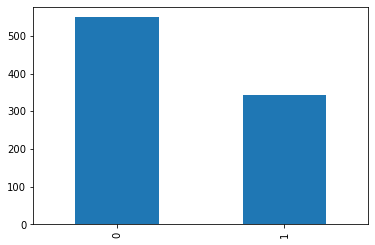

In [115]:
#2. 목표변수 및 설명변수(범주형/연속형 변수별)의 분포 확인
#2-1. 목표변수(Survived) - 범주형
df_survived = df["Survived"].value_counts()
df_survived.plot.bar()

<AxesSubplot:>

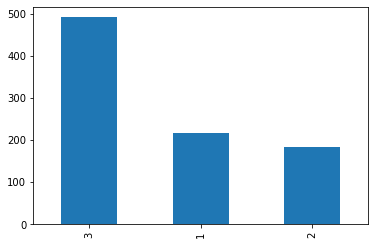

In [116]:
#2-2. 설명변수
#1) Pclass - 범주형
df_pclass = df["Pclass"].value_counts()
df_pclass.plot.bar()

<AxesSubplot:>

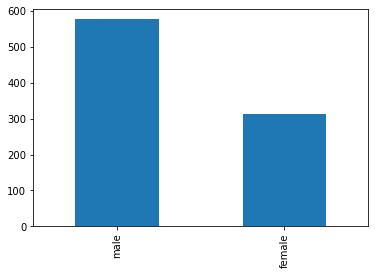

In [117]:
#2) Sex - 범주형
df_sex = df["Sex"].value_counts()
df_sex.plot.bar()

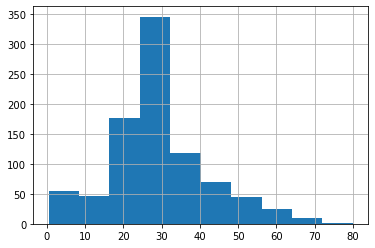

In [118]:
#3) Age - 연속형
df_age = df["Age"].hist()

<AxesSubplot:>

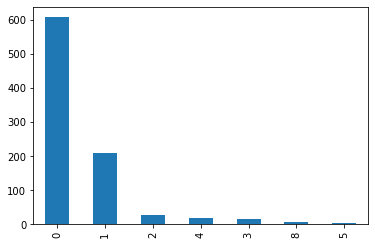

In [119]:
#4) SibSp - 범주형
df_sibsp = df["SibSp"].value_counts()
df_sibsp.plot.bar()

<AxesSubplot:>

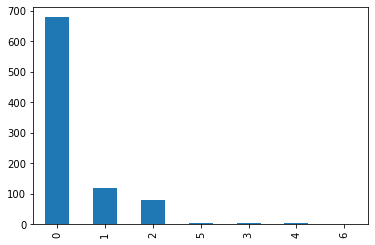

In [120]:
#5) Parch - 범주형
df_parch = df["Parch"].value_counts()
df_parch.plot.bar()

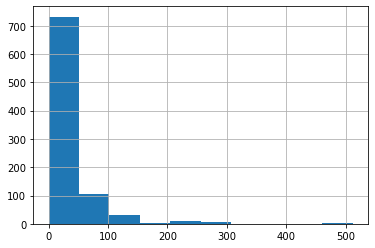

In [121]:
#6) Fare - 연속형
df_age = df["Fare"].hist()

<AxesSubplot:>

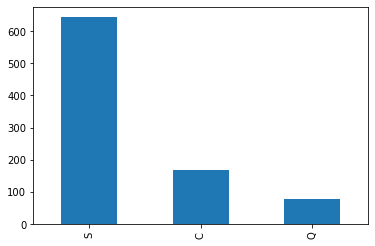

In [122]:
#7) Embarked - 범주형
df_embarked = df["Embarked"].value_counts()
df_embarked.plot.bar()

In [123]:
#3. 변수들의 결측 및 이상치 처리
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
#1) Cabin 컬럼 제거
df.drop(columns='Cabin', inplace=True)

In [125]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [126]:
#2) Embarked 결측치 2개 count가 높은 것으로 채움
df["Embarked"].fillna("S", inplace=True)

In [127]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:ylabel='None'>

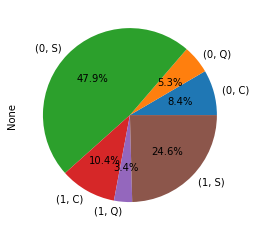

In [128]:
#4. 그래프 분석을 통해 변수간 관계를 확인
#1) 선실등급은 생존에 영향을 주는 설명변수일 것이다.
df_count = df.groupby(["Survived", "Embarked"]).size()
df_count.plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='None'>

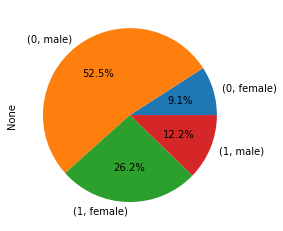

In [129]:
#2) 성별은 생존에 영향을 주는 설명변수일 것이다.
df_count = df.groupby(["Survived", "Sex"]).size()
df_count.plot.pie(autopct="%.1f%%")

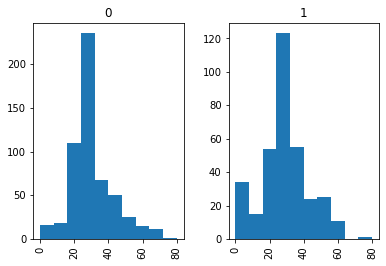

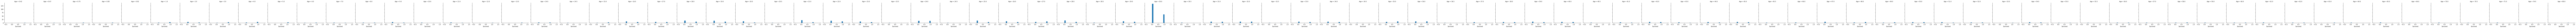

In [130]:
#3) 나이는 생존에 영향을 주는 설명변수일 것이다.
df.hist(column="Age", by="Survived", range=(0,80))
grid = sns.FacetGrid(df, col="Age")
grid.map(plt.hist, "Survived")

<AxesSubplot:ylabel='None'>

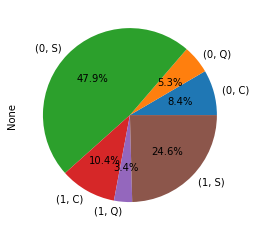

In [131]:
#4) 승선장소는 생존에 영향을 주는 설명변수일 것이다.
df_count = df.groupby(["Survived", "Embarked"]).size()
df_count.plot.pie(autopct="%.1f%%")

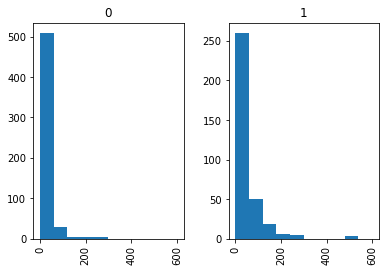

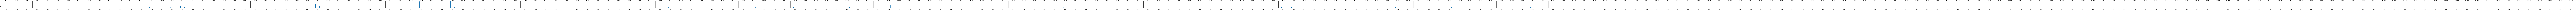

In [132]:
#5) 티켓 가격은 생존에 영향을 주는 설명변수일 것이다.
df.hist(column="Fare", by="Survived", range=(0,600))
grid = sns.FacetGrid(df, col="Fare")
grid.map(plt.hist, "Survived")

<AxesSubplot:ylabel='None'>

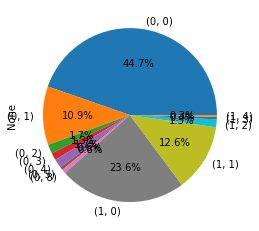

In [133]:
#6) 함께 탑승수(형제, 배우자)는 생존에 영향을 주는 설명변수일 것이다.
df_count = df.groupby(["Survived", "SibSp"]).size()
df_count.plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='None'>

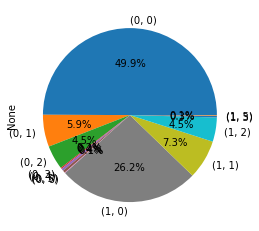

In [134]:
#7) 함께 탑승수(자녀, 부모)는 생존에 영향을 주는 설명변수일 것이다.
df_count = df.groupby(["Survived", "Parch"]).size()
df_count.plot.pie(autopct="%.1f%%")

## 5. 생존에 영향을 미치는 잠재 인자 도출
### 분석결과: S등급이 가장 사망률이 높다.
###                 남성이 많이 죽고 여성이 많이 살았다.
###                 승선장소가 S가 많이 사망했다.
###                 티켓 가격은 생존률과 무관한 변수이다.
###                 함께 탑승수(형제, 배우자 / 자녀, 부모)가 없는 사람이 많이 죽었다.
###
###  잠재인자: Pclass, Sex, Embarked, Fare, SibSp, Parch            

# 실습 2

In [135]:
import pandas as pd
import numpy as np

df_mycars = pd.read_csv("../data/mycars.csv")
df_mycars

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize


In [136]:
#1. 시내에서 연비(mpg) 통계치: 구동 방식별 데이터 수, 평균, 중앙값, 표준편차, min, max, Q1, Q3
#1-1. 시내에서 driving 별, mpg 데이터 subset 
df1 = df_mycars[['driving', 'mpg']]
df1

,driving,mpg
0,f,18
1,f,21
2,f,20
3,f,21
4,f,16
...,...,...
229,f,19
230,f,21
231,f,16
232,f,18


In [137]:
#1-2. driving(구동 방식)별 데이터 수, 평균, 중앙값, 표준편차, min, max, Q1, Q3
df1.groupby('driving').describe()

mpg                                                   
         count       mean       std   min   25%   50%   75%   max
driving                                                          
4        103.0  14.330097  2.874459   9.0  13.0  14.0  16.0  21.0
f        106.0  19.971698  3.626510  11.0  18.0  19.0  21.0  35.0
r         25.0  14.080000  2.215852  11.0  12.0  15.0  15.0  18.0

In [138]:
#2. 고속도로에서 연비(mpg) 통계치: 구동 방식별 데이터 수, 평균, 중앙값, 표준편차, min, max, Q1, Q3
#2-1. 고속도로에서 driving 별, mpg 데이터 subset 
df2 = df_mycars[['driving', 'highway_mileage']]
df2

,driving,highway_mileage
0,f,29
1,f,29
2,f,31
3,f,30
4,f,26
...,...,...
229,f,28
230,f,29
231,f,26
232,f,26


# 실습 3

In [139]:
df = pd.read_csv("../data/mycars.csv")
df

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize


In [140]:
#결측지 확인
df.isnull().sum() 

manufacturer       0
model              0
displacement       0
year               0
cylinder           0
automatic          0
driving            0
mpg                0
highway_mileage    0
fuel               0
class              0
dtype: int64

In [141]:
#1. 자동차 모델별로 count
df.groupby(["model"]).agg(["count"])

,manufacturer,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
,count,count,count,count,count,count,count,count,count,count
model,,,,,,,,,,
4runner 4wd,6,6,6,6,6,6,6,6,6,6
a4,7,7,7,7,7,7,7,7,7,7
a4 quattro,8,8,8,8,8,8,8,8,8,8
a6 quattro,3,3,3,3,3,3,3,3,3,3
altima,6,6,6,6,6,6,6,6,6,6
c1500 suburban 2wd,5,5,5,5,5,5,5,5,5,5
camry,7,7,7,7,7,7,7,7,7,7
camry solara,7,7,7,7,7,7,7,7,7,7


In [142]:
#2. driving 방식별로 count
df.groupby(["driving"]).agg(["count"])

,manufacturer,model,displacement,year,cylinder,automatic,mpg,highway_mileage,fuel,class
,count,count,count,count,count,count,count,count,count,count
driving,,,,,,,,,,
4,103,103,103,103,103,103,103,103,103,103
f,106,106,106,106,106,106,106,106,106,106
r,25,25,25,25,25,25,25,25,25,25


# 실습 4

In [143]:
mu = 175 #평균
sigma = 5 #표준편차
x = 180

prob = stats.norm.cdf(x, mu, sigma)
print("키가 {0}cm인 경우, {1}% 범위에 위치합니다.".format(x, (1-prob)*100))

키가 180cm인 경우, 15.865525393145708% 범위에 위치합니다.


# 실습 5

In [144]:
mu = 12 #평균
sigma = 3 #표준편차
x1 = 15
x2 = 9

In [145]:
#1. 1리터를 가지고 9km 이상 15km 이하를 달릴 확률은 얼마인가요?
prob1 = stats.norm.cdf(x1, mu, sigma) #누적확률, 15km 이하 값 계산
print("{0}km 이상 {1}km 이하를 달릴 확률은 {2:.1f}%에 해당합니다.".format(x2, x1, 2*(prob1-0.5)*100))

9km 이상 15km 이하를 달릴 확률은 68.3%에 해당합니다.


In [146]:
#2. 1리터를 가지고 15km 이상 달릴 확률은 얼마인가요?
print("{0}km 이상 {1}km 이하를 달릴 확률은 {2:.1f}%에 해당합니다.".format(x2, x1, (1-prob1)*100))

9km 이상 15km 이하를 달릴 확률은 15.9%에 해당합니다.


# 실습 6

In [147]:
t = 2.0 #t값
df = 100 #자유도

#t값이 2.0일 때, P(T<=t)를 계산하시오.
prob = stats.t.cdf(t, df) #누적확률 값 계산
print("P(T<=t): {:.3f}".format(prob))

P(T<=t): 0.976


# 실습 7

In [148]:
chisq = 3.0 #확률변수 x^2
df = 8 #자유도

#x^2값이 3.0일 때, P(X<=x^2)을 계산하시오.
prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}): {1:.4f}".format(chisq, prob))

P(X<=3.0): 0.0656


# 실습 8

In [149]:
f = 1.5 #확률변수 F
dfnum = 10 #자유도
dfden = 100 #자유도

#F값이 1.5일 때, P(X<=F)을 계산하시오.
prob = stats.f.cdf(x=f, dfn=dfnum, dfd=dfden)
print("P(X<=F): {:.3f}".format(prob))

P(X<=F): 0.850


# 실습 9

In [150]:
n = 5 #n의 수
p = 0.3 #광택도 불량

#5대의 차량을 임의로 선택했을 때, 불량대수가 각각 0, 1, 2, 3, 4, 5대가 나올 확률은 얼마인가요?
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=p)
    print("P(X={0}) = {1:.3f}".format(i, prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002
